In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
my_color1 = 'cornflowerblue'
my_color2 = 'dodgerblue'

In [2]:
original_df = pd.read_csv("datas/bank-additional-full.csv",delimiter=";")

In [3]:
original_df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4820,32,services,married,high.school,no,yes,yes,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
14919,30,blue-collar,married,basic.6y,no,yes,yes,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
3124,43,unknown,married,high.school,unknown,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
39410,76,retired,married,basic.4y,no,no,no,cellular,apr,tue,...,4,999,1,failure,-1.8,93.749,-34.6,0.638,5008.7,no
5367,53,entrepreneur,married,university.degree,unknown,no,yes,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4481,48,blue-collar,divorced,professional.course,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
25998,34,admin.,married,university.degree,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
18477,35,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
15153,36,technician,single,professional.course,no,no,no,cellular,jul,thu,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
16196,36,admin.,single,high.school,no,no,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
original_df.shape

(41188, 21)

### Data Preparation

In [6]:
df = original_df.rename(columns={'y':'deposit'})

In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
deposit
['no' 'yes']


In [8]:
df.duplicated().sum()

12

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(41176, 21)

In [11]:
(df['education'].values == 'unknown').sum()


1730

In [12]:
# In this dataset, missing data is indicated as "unknown".

(df == 'unknown').sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
deposit              0
dtype: int64

In [13]:
# We found "unknown" label frequency in the dataset
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    print('---------')
    print(df.groupby(by=[col]).size()/len(df))

---------
job
admin.           0.253036
blue-collar      0.224718
entrepreneur     0.035360
housemaid        0.025743
management       0.071012
retired          0.041723
self-employed    0.034510
services         0.096343
student          0.021250
technician       0.163663
unemployed       0.024626
unknown          0.008014
dtype: float64
---------
marital
divorced    0.111983
married     0.605231
single      0.280843
unknown     0.001943
dtype: float64
---------
education
basic.4y               0.101418
basic.6y               0.055639
basic.9y               0.146809
high.school            0.231008
illiterate             0.000437
professional.course    0.127259
university.degree      0.295415
unknown                0.042015
dtype: float64
---------
default
no         0.791165
unknown    0.208762
yes        0.000073
dtype: float64
---------
housing
no         0.452084
unknown    0.024043
yes        0.523873
dtype: float64
---------
loan
no         0.824218
unknown    0.024043
yes       

In [14]:
df.replace(to_replace='unknown',value=np.NaN,inplace=True)

"""df.dropna(inplace=True)"""

# filled with most frequently used value
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    df[col].fillna(df[col].mode()[0], inplace=True)



"# filled with most frequently used value\nfor col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:\n    df[col].fillna(df[col].mode()[0], inplace=True)"

categorical variables:
- job : "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"
- marital : "divorced","married","single","unknown"
- education : "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"
- default : "no","yes","unknown"
- housing : "no","yes","unknown"
- loan : "no","yes","unknown"
- contact : "cellular","telephone"
- month : "jan", "feb", "mar", ..., "nov", "dec"
- day_of_week : "mon","tue","wed","thu","fri"
- poutcome :"failure","nonexistent","success"
- deposit : binary: "yes","no"
---
- pdays : 999 means client was not previously contacted
- Missing Attribute Values : all coded with the "unknown" label

- Classification
    - KNN
    - SVM
    - Decision Tree
    - Decision Tree
    - Logistic Regression
    - GradientBoostingClassifier
    - XGBClassifier
    - GaussianNB 

- plan
    - look at data
    - clean data
    - baseline model
    - feature engineering
    - calculate metrics

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  duration        30478 non-null  int64  
 11  campaign        30478 non-null  int64  
 12  pdays           30478 non-null  int64  
 13  previous        30478 non-null  int64  
 14  poutcome        30478 non-null  object 
 15  emp.var.rate    30478 non-null  float64
 16  cons.price.idx  30478 non-null  float64
 17  cons.conf.idx   30478 non-null  floa

In [55]:
numeric_variables = df.select_dtypes(include=['int64', 'float64'])

numeric_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30478.0,39.029694,10.332746,17.000,31.000,37.000,45.000,95.000
duration,30478.0,259.513124,261.746393,0.000,103.000,181.000,321.000,4918.000
campaign,30478.0,2.521721,2.720495,1.000,1.000,2.000,3.000,43.000
pdays,30478.0,956.318295,201.404843,0.000,999.000,999.000,999.000,999.000
previous,30478.0,0.194337,0.522862,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30478.0,-0.071425,1.610306,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30478.0,93.523376,0.585366,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30478.0,-40.602579,4.788790,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30478.0,3.459976,1.777215,0.634,1.313,4.856,4.961,5.045
nr.employed,30478.0,5160.813967,75.158267,4963.600,5099.100,5191.000,5228.100,5228.100


In [56]:
categ_variables = df.select_dtypes(include='object')

categ_variables.describe().T

,count,unique,top,freq
job,30478,11,admin.,8734
marital,30478,3,married,17487
education,30478,7,university.degree,10408
default,30478,2,no,30475
housing,30478,2,yes,16516
loan,30478,2,no,25710
contact,30478,2,cellular,20435
month,30478,10,may,9731
day_of_week,30478,5,thu,6391
poutcome,30478,3,nonexistent,25826


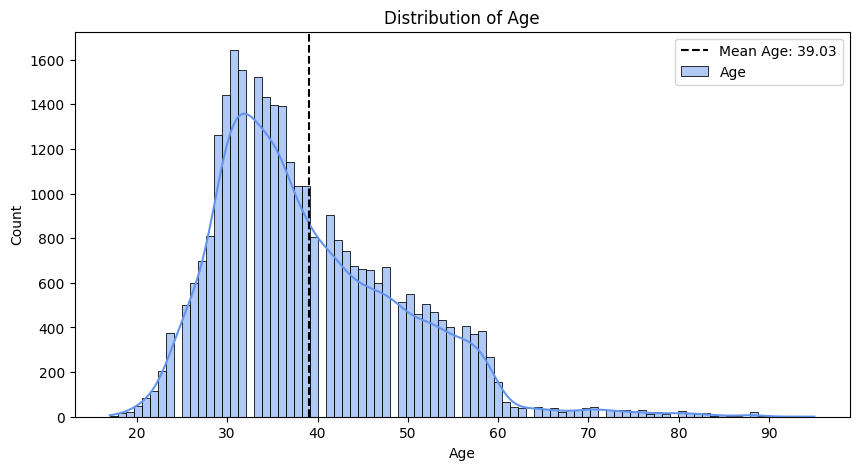

In [80]:
# Visaulizing how age is distributed in the dataset
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', kde=True, color=my_color1, edgecolor='black' , label ='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.xlabel("Age")
plt.title('Distribution of Age')
plt.show()

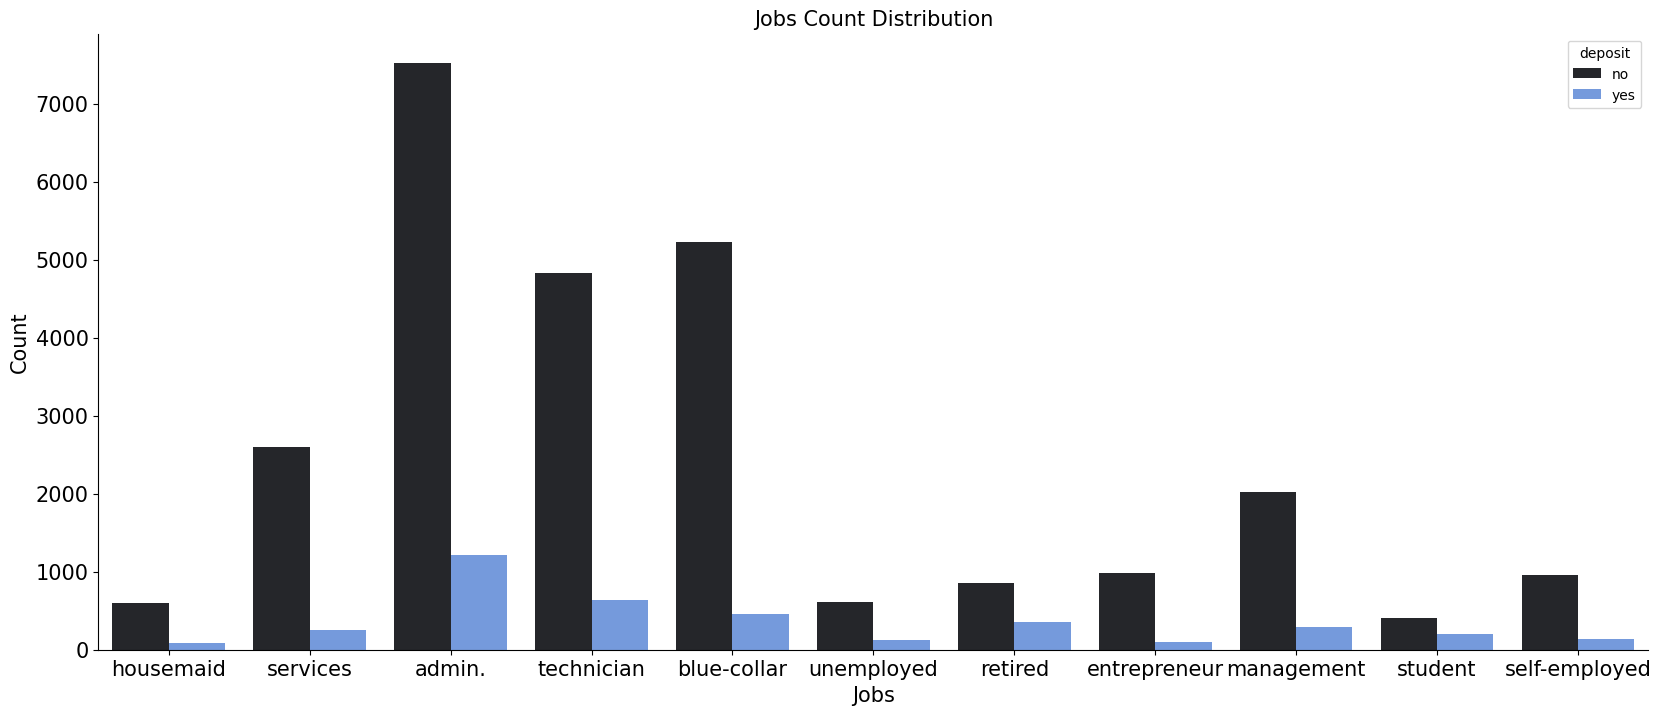

In [101]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
plt.figure(figsize=(20,8))
sns.countplot(x = 'job', data = df, hue = 'deposit',palette='dark:' + my_color1)
plt.xlabel('Jobs', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Jobs Count Distribution', fontsize=15)
plt.tick_params(labelsize=15)
sns.despine()



C:\Users\Fydil35\AppData\Local\Temp\ipykernel_236\1751087431.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)


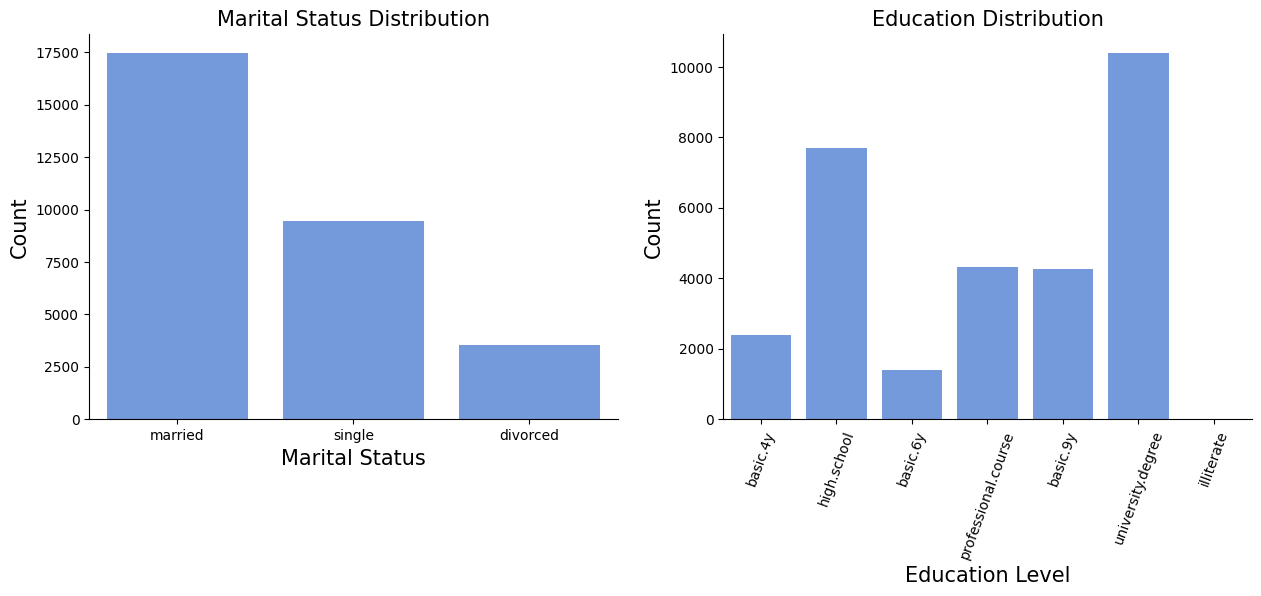

In [102]:
# Visualizing how Maritial Status and Education is distributed in the dataset. 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# First plot for marital status
sns.countplot(x = "marital", data = df, ax = ax1, color=my_color1)
ax1.set_title("Marital Status Distribution", fontsize = 15)
ax1.set_xlabel("Marital Status", fontsize = 15)
ax1.set_ylabel("Count", fontsize = 15)

# Second plot for Education distribution
sns.countplot(x = "education", data = df, ax = ax2, color=my_color1)
ax2.set_title("Education Distribution", fontsize = 15)
ax2.set_xlabel("Education Level", fontsize = 15)
ax2.set_ylabel("Count", fontsize = 15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)
sns.despine()


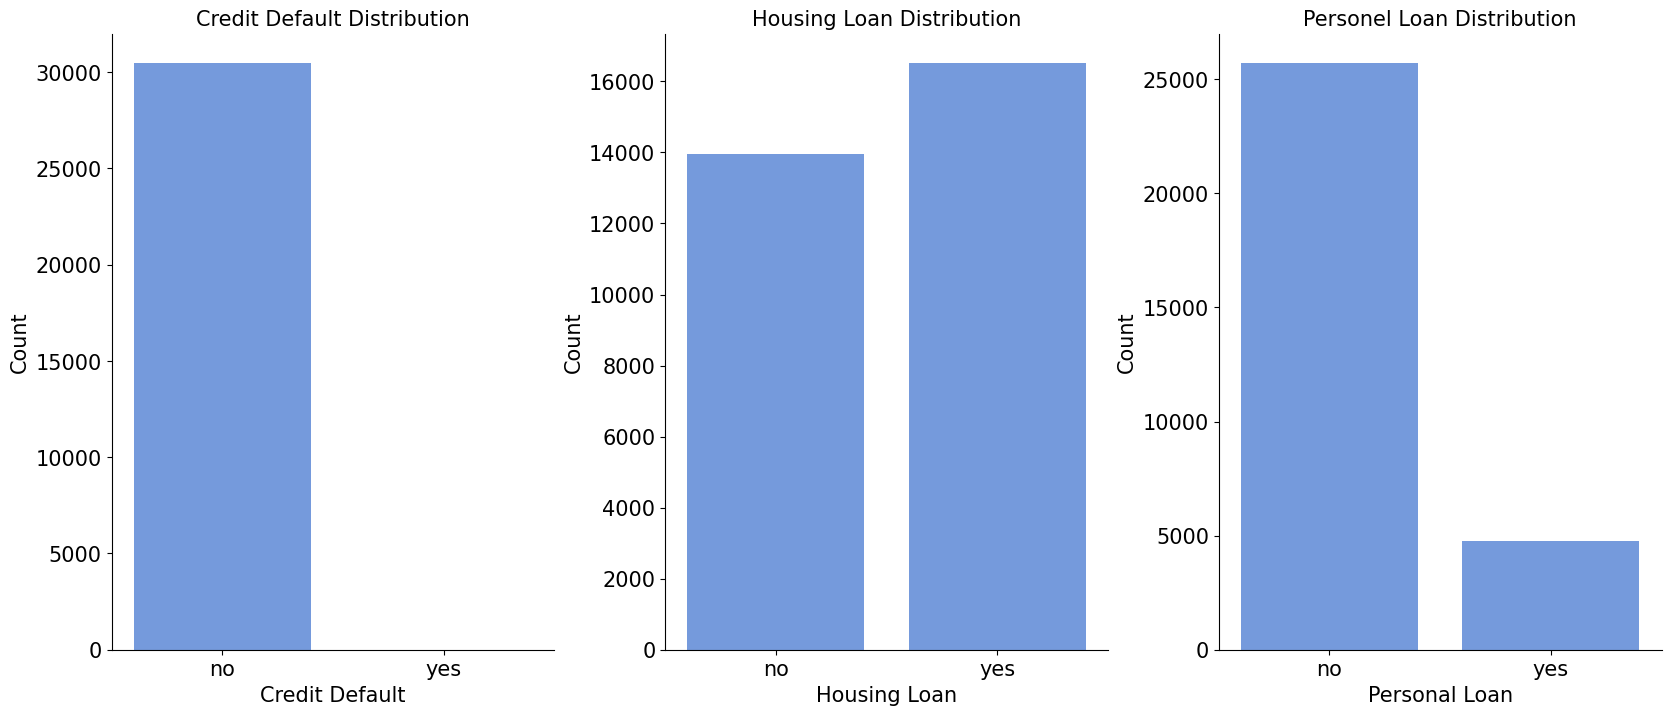

In [114]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, color=my_color1 )
ax1.set_title('Credit Default Distribution', fontsize=15)
ax1.set_xlabel('Credit Default', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax2, color=my_color1)
ax2.set_title('Housing Loan Distribution', fontsize=15)
ax2.set_xlabel('Housing Loan', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax3, color=my_color1)
ax3.set_title('Personel Loan Distribution', fontsize=15)
ax3.set_xlabel('Personal Loan', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
sns.despine()

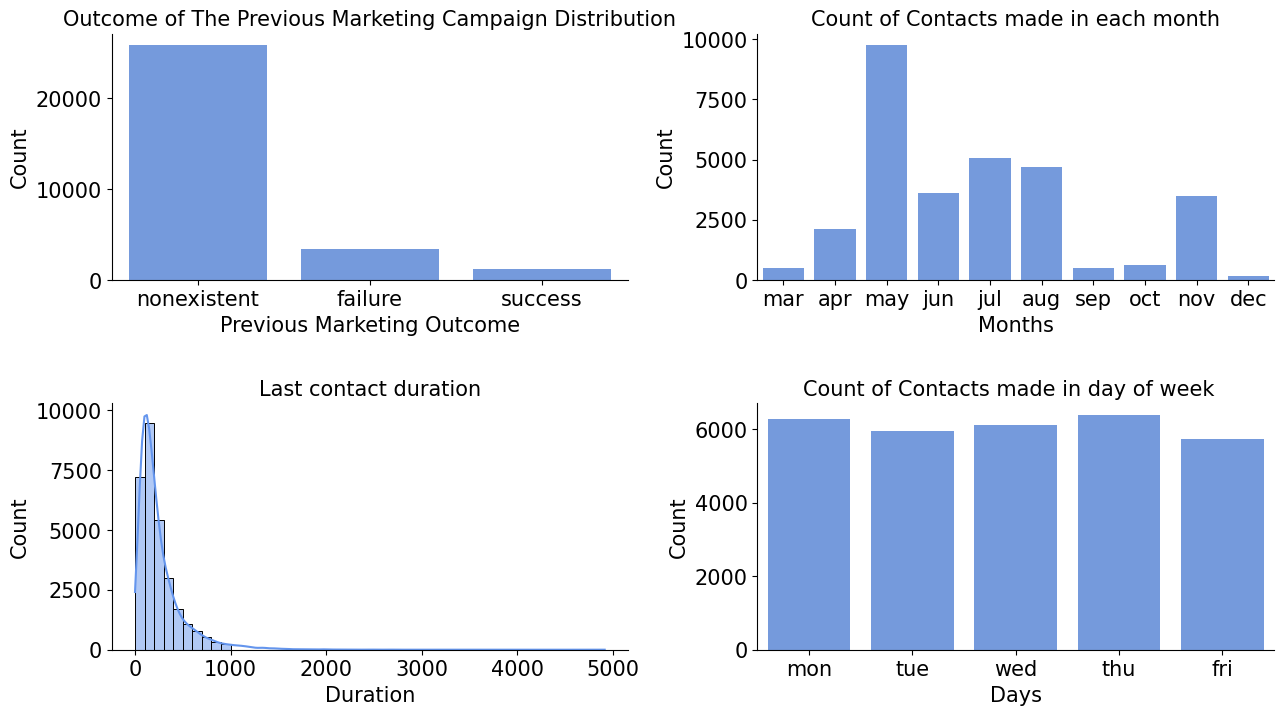

In [127]:
#outcome of the previous marketing campaign
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
sns.countplot( x= 'poutcome', data = df, color=my_color1 ,ax=ax1)
ax1.set_title("Outcome of The Previous Marketing Campaign Distribution", fontsize=15)
ax1.set_xlabel('Previous Marketing Outcome', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# For Months
sns.countplot(x = 'month', data = df, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],color=my_color1 )
ax2.set_xlabel("Months", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)
ax2.set_title("Count of Contacts made in each month", fontsize=15)
ax2.tick_params(labelsize=15)


# For duration
sns.histplot(data=df, x='duration',
             bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
             kde=True, 
             color=my_color1, 
             edgecolor='black',
             ax = ax3, 
             label ='duration')


ax3.set_xlabel("Duration", fontsize=15)
ax3.set_ylabel("Count", fontsize=15)
ax3.set_title("Last Contact Duration", fontsize=15)
ax3.tick_params(labelsize=15)

# day_of_week     
sns.countplot(x = 'day_of_week', data = df, ax = ax4, order = ['mon', 'tue', 'wed', 'thu', 'fri'],color=my_color1 )
ax4.set_xlabel("Days", fontsize=15)
ax4.set_ylabel("Count", fontsize=15)
ax4.set_title("Count of Contacts made in Days of Week", fontsize=15)
ax4.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.5)
sns.despine()
plt.show()